In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

#Loading and Preprocessing Data

In [ ]:
dataset=pd.read_csv("Asteroid_Updated.csv")
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62553 entries, 0 to 62552
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            18619 non-null  object 
 1   a               62553 non-null  float64
 2   e               62553 non-null  float64
 3   i               62553 non-null  float64
 4   om              62553 non-null  float64
 5   w               62553 non-null  float64
 6   q               62553 non-null  float64
 7   ad              62553 non-null  float64
 8   per_y           62553 non-null  float64
 9   data_arc        62553 non-null  int64  
 10  condition_code  62553 non-null  int64  
 11  n_obs_used      62553 non-null  int64  
 12  H               62553 non-null  float64
 13  neo             62553 non-null  object 
 14  pha             62553 non-null  object 
 15  diameter        41087 non-null  object 
 16  extent          15 non-null     object 
 17  albedo          41067 non-null 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,16,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
missing_values_in_dataset=dataset.isnull().sum()
print(missing_values_in_dataset)

name              43934
a                     0
e                     0
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc              0
condition_code        0
n_obs_used            0
H                     0
neo                   0
pha                   0
diameter          21466
extent            62538
albedo            21486
rot_per           51648
GM                62541
BV                61535
UB                61577
IR                62553
spec_B            61079
spec_T            61577
G                 62438
moid                  0
class                 0
n                     0
per                   0
ma                    1
dtype: int64


In [ ]:
dataset=dataset.drop(['spec_B','spec_T','extent','name','IR'],axis=1)


In [ ]:
dataset['diameter']=dataset['diameter'].astype(float)




In [ ]:
  dataset['neo'].fillna(dataset['neo'].mode()[0],inplace=True)
  dataset['class'].fillna(dataset['class'].mode()[0],inplace=True)
  dataset['pha'].fillna(dataset['pha'].mode()[0],inplace=True)

In [ ]:
dataset.fillna(dataset.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dataset['neo']= label_encoder.fit_transform(dataset['neo'])
dataset['class']= label_encoder.fit_transform(dataset['class']) 
dataset['pha']= label_encoder.fit_transform(dataset['pha'])

In [ ]:
missing_values_in_dataset=dataset.isnull().sum()
print(missing_values_in_dataset)

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
rot_per           0
GM                0
BV                0
UB                0
G                 0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64


In [ ]:
dataset

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,rot_per,GM,BV,UB,G,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,0,1002,3.34,0,0,939.400000,0.090000,9.074170,62.628400,0.713000,0.426000,0.120000,1.594780,6,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,0,8490,4.13,0,0,545.000000,0.101000,7.813200,14.300000,0.635000,0.284000,0.110000,1.233240,6,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,0,7104,5.33,0,0,246.596000,0.214000,7.210000,9.125582,0.824000,0.433000,0.320000,1.034540,6,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,0,9325,3.20,0,0,525.400000,0.422800,5.342128,17.800000,0.782000,0.492000,0.320000,1.139480,6,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507,0,2916,6.85,0,0,106.699000,0.274000,16.806000,9.125582,0.826000,0.411000,0.186696,1.095890,6,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62548,2.566705,0.191675,15.343774,36.443703,315.568790,2.074731,3.058678,4.112180,8236,0,414,15.40,0,0,8.844775,0.195062,23.140197,9.125582,0.769263,0.364647,0.186696,1.098340,6,0.239685,1501.973622,200.524292
62549,2.567595,0.130033,4.089553,346.490928,265.042058,2.233723,2.901468,4.114320,8207,0,774,15.50,0,0,5.132000,0.024000,23.140197,9.125582,0.769263,0.364647,0.186696,1.223870,6,0.239560,1502.755378,282.774539
62550,3.175677,0.142524,14.178510,195.815563,334.108368,2.723067,3.628286,5.659300,7576,0,749,14.20,0,0,8.159000,0.067000,23.140197,9.125582,0.769263,0.364647,0.186696,1.735390,6,0.174160,2067.059154,305.643603
62551,2.899565,0.084293,2.786568,134.804595,164.586029,2.655153,3.143977,4.937504,7844,0,710,14.90,0,0,3.062000,0.188000,23.140197,9.125582,0.769263,0.364647,0.186696,1.638870,6,0.199620,1803.423323,335.660976


In [ ]:
dataset.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc            int64
condition_code      int64
n_obs_used          int64
H                 float64
neo                 int64
pha                 int64
diameter          float64
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
G                 float64
moid              float64
class               int64
n                 float64
per               float64
ma                float64
dtype: object

In [ ]:
dataset.shape

(62553, 26)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62553 entries, 0 to 62552
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               62553 non-null  float64
 1   e               62553 non-null  float64
 2   i               62553 non-null  float64
 3   om              62553 non-null  float64
 4   w               62553 non-null  float64
 5   q               62553 non-null  float64
 6   ad              62553 non-null  float64
 7   per_y           62553 non-null  float64
 8   data_arc        62553 non-null  int64  
 9   condition_code  62553 non-null  int64  
 10  n_obs_used      62553 non-null  int64  
 11  H               62553 non-null  float64
 12  neo             62553 non-null  int64  
 13  pha             62553 non-null  int64  
 14  diameter        62553 non-null  float64
 15  albedo          62553 non-null  float64
 16  rot_per         62553 non-null  float64
 17  GM              62553 non-null 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
target=dataset['diameter']
feature=dataset.drop(['diameter'],axis=1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(feature,target,train_size=0.75,random_state=5)

# Linear Regression 

In [ ]:
lr=LinearRegression()
lr.fit(X_train, Y_train)
score=lr.score(X_test, Y_test)
print(lr.score(X_test, Y_test))

0.5247484686274966


In [ ]:
y_pred=lr.predict(X_test)
y_pred 

array([34.05060176,  6.74424261, -0.29210777, ..., 18.07258213,
       28.50781009,  2.30891698])

## plotting residual errors in training data|
## plotting residual errors in test data
## plotting line for zero residual error
---



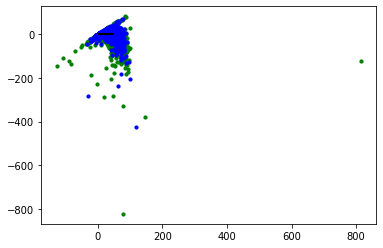

In [ ]:

plt.scatter(lr.predict(X_train), lr.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data')
 

plt.scatter(lr.predict(X_test), lr.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data')
 

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

# applying ridge regression and calculating mean square error

In [ ]:
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,Y_train)

pred = ridgeReg.predict(X_test)

mse = np.mean((pred - Y_test)**2)
mse

In [ ]:
print("Mean Square error: ",mse)

Mean Square error:  77.90862667495632


# applying lasso regression and calculating mean square error

In [ ]:
lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train,Y_train)

pred1 = lassoReg.predict(X_test)


In [ ]:
msee=np.mean((pred1-Y_test)**2)
msee

157.18544424527806

#Applying Decision Tree 

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_X= StandardScaler()  
X_train= st_X.fit_transform(X_train)    
X_test= st_X.transform(X_test)   

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, Y_train) 

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train,Y_train)

In [ ]:
print()